# Complete Guide to Pandas.

Hi All ✌️, writing an article on Kaggle after a very long time. 

In this one I try to cover all the basic **Pandas** operations. 

For this, I will use the Titanic dataset. I have added a few more data sources so that the kernel reaches the mass and also you can run it on those datasets without much change.

Hope you find it useful, and if you do, make sure to drop a 👍.

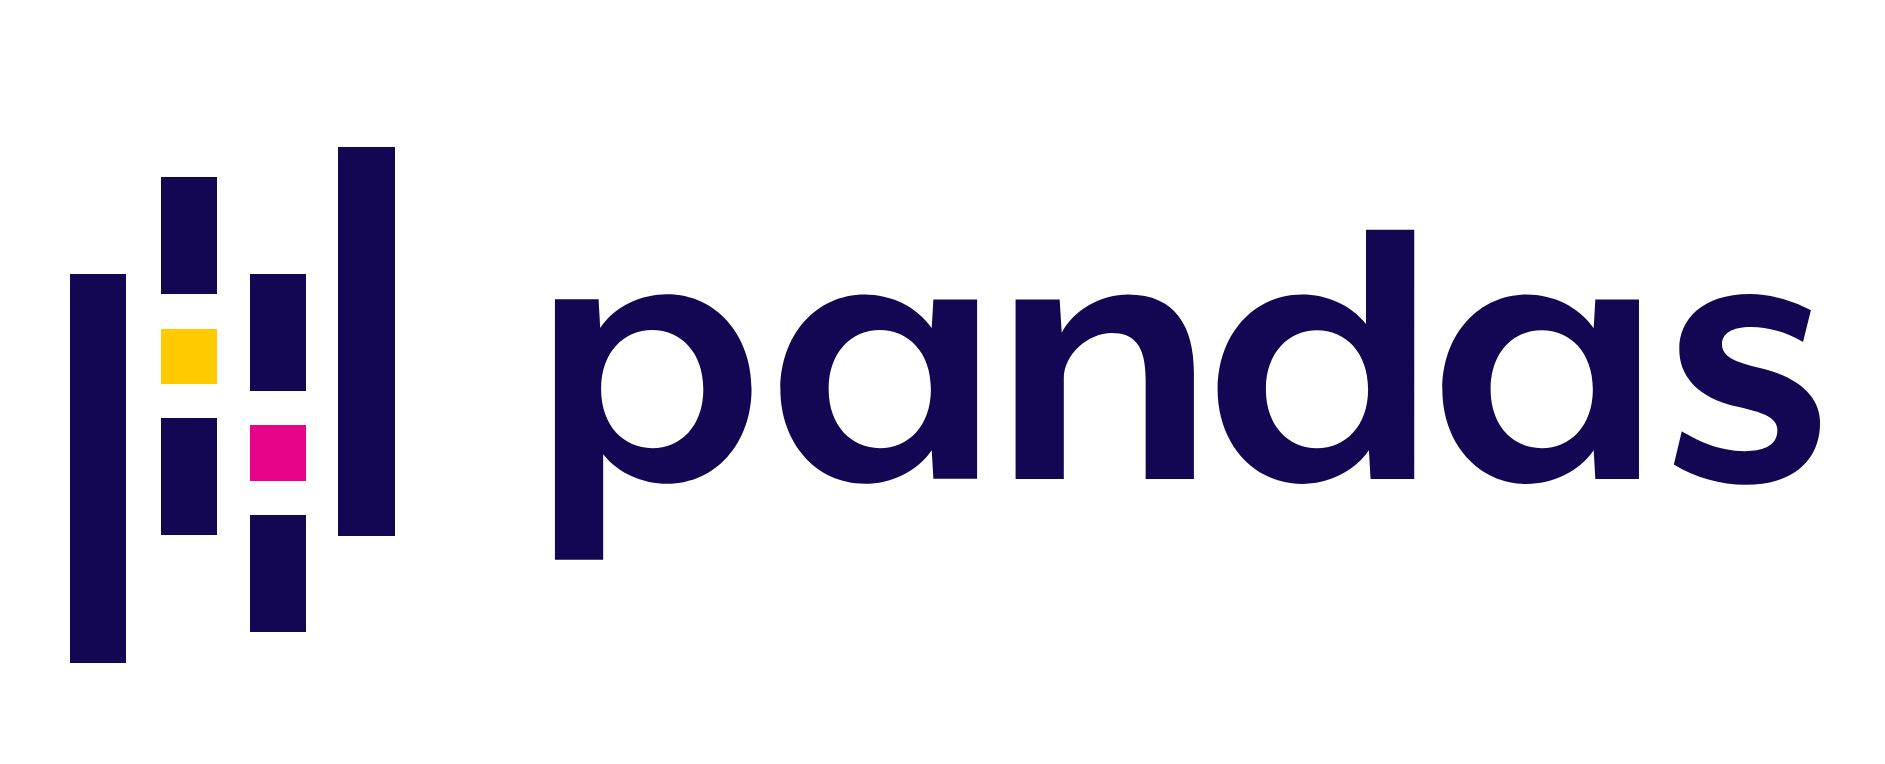

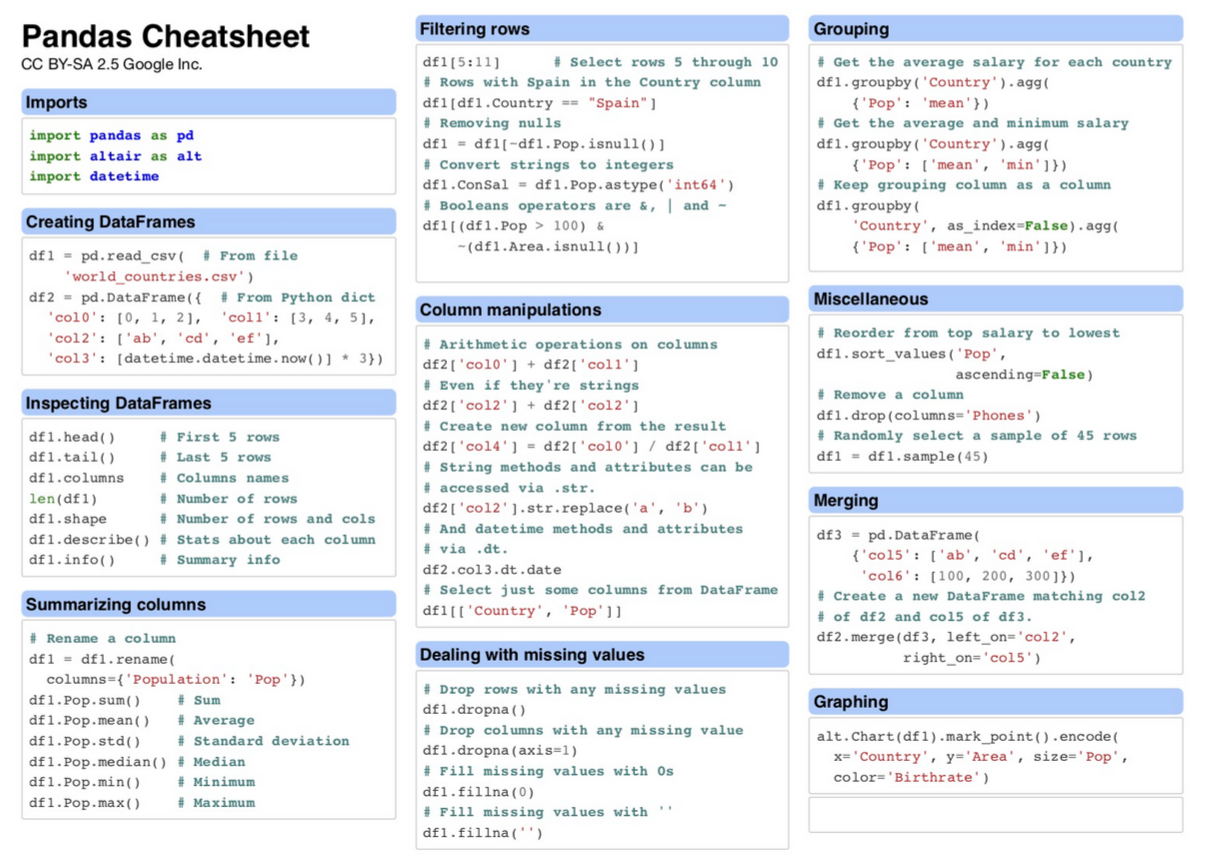

#### Importing modules.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#### Importing data.

For this tutorial, we will use the standard Titanic Dataset.

In [2]:
train=pd.read_csv('train.csv')
df=train.copy()

<a id="content1"></a>
## 1. The Basics

In [3]:
# See the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# last 5 rows.
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# n_samples x n_features
df.shape

(891, 12)

In [6]:
#List of all the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Rows index
df.index

RangeIndex(start=0, stop=891, step=1)

In [8]:
# Values with their counts in a particular column
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
# General description of dataset.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="content2"></a>
## 2. Creating DataFrame

In [10]:
# empty data frame
df_empty=pd.DataFrame()
df_empty.head()  #;)

""


In [11]:
# From dict
student_dict={'Name':['A','B','C'],'Age':[24,18,17],'Roll':[1,2,3]}
df_student=pd.DataFrame(student_dict).reset_index(drop=True) # without this adds an additional index column in df
df_student.head()

,Name,Age,Roll
0,A,24,1
1,B,18,2
2,C,17,3


<a id="content3"></a>
## 3. Treating null values

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# on whole df.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# on a particular column
df['Age'].isnull().sum()

177

#### Impute null values

In [15]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Age'].isnull().sum()

0

In [16]:
df['Sex'].fillna(df['Sex'].mode(),inplace=True)
df['Sex'].isnull().sum()

0

<a id="content4"></a>
## 4. Modify/Add new column(s).
Adding another column or modify a column.

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df['Sex']=df['Sex'].map({"male":'0',"female":"1"})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Finding last name and first name from Name column.
df['last_name']=df['Name'].apply(lambda x: x.split(',')[0])
df['first_name']=df['Name'].apply(lambda x: ' '.join(x.split(',')[1:]))


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,first_name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [21]:
# Sets to 1 for men in 3rd class.
df['Thrid&Men']=df.apply(lambda row: int(row['Pclass']==3 and row['Sex']=="0"),axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,first_name,Thrid&Men
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1


##### Calling some custom function.

In [22]:
def findAgeGroup(age):
    if age<18:
        return 1
    elif age>=18 and age<40:
        return 2
    elif age>=40 and age<60:
        return 3
    else:
        return 4
df['Age_group']=df['Age'].apply(lambda x: findAgeGroup(x))
# Calling a custom function.

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,first_name,Thrid&Men,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,2


<a id="content5"></a>
## 5. Deleting columns

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,first_name,Thrid&Men,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,2


In [25]:
df=df.drop(['PassengerId'],axis=1)
#df=df.drop(['PassengerId'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,first_name,Thrid&Men,Age_group
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,2


<a id="content6"></a>
## 6. Renaming columns

In [26]:
# Lets try to rename some columns. 
df=df.rename(columns={'Sex':'Gender','Name':'Full Name','last_name':'Surname','first_name':'Name'})
df.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,2


Similarly, we can do for whichever column we want.

<a id="content7"></a>
## 7.i Slicing DataFrame

In [27]:
df.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,2


In [28]:
# All rows with pclass==3
df_third_class=df[df['Pclass']==3].reset_index(drop=True) # w/0 drop=True it actually adds a index column rather.
df_third_class.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,2
1,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,2
2,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,2
3,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,1,2
4,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,1,1


In [29]:
# Females with age > 60
df_aged=df[(df['Age']>60) & (df['Gender']=="1")]
df_aged.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
275,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0,1,0,13502,77.9583,D7,S,Andrews,Miss. Kornelia Theodosia,0,4
483,1,3,"Turkula, Mrs. (Hedwig)",1,63.0,0,0,4134,9.5875,NaN,S,Turkula,Mrs. (Hedwig),0,4
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0000,B28,NaN,Stone,Mrs. George Nelson (Martha Evelyn),0,4


**Note that all these three ladies were saved as they were senior citizen and women so they may have been given priority.**

In [30]:
# Selecting some columns.
df1=df[['Age','Pclass','Gender']]
df1.head()

,Age,Pclass,Gender
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


In [31]:
# Select numerical columns only
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_num = df.select_dtypes(include=numerics)
df_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Thrid&Men,Age_group
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,2
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [32]:
# categorical columns
df_cat=df.select_dtypes(include=['object'])
df_cat.head()

,Full Name,Gender,Ticket,Cabin,Embarked,Surname,Name
0,"Braund, Mr. Owen Harris",0,A/5 21171,NaN,S,Braund,Mr. Owen Harris
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,PC 17599,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,"Heikkinen, Miss. Laina",1,STON/O2. 3101282,NaN,S,Heikkinen,Miss. Laina
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,113803,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,"Allen, Mr. William Henry",0,373450,NaN,S,Allen,Mr. William Henry


<a id="content8"></a>
## 7.ii Slicing using iloc and loc

#### iloc

In [33]:
df.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,2


In [34]:
# First 100 rows & all columns
df_sub1=df.iloc[0:100,:]
df_sub1.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,2


In [35]:
#First 250 rows with a subset of columns

#df_sub2=df.iloc[:250,['Age']] 
# This will throw an error as iloc only consumes integres as indices.

df_sub2=df.iloc[:250,[1,8]] 
#Returns first 250 rows and columns at those indices in df.columns.
df_sub2.head()

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500


#### loc

In [36]:
df.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,2


In [37]:
# First 500 rows.
df_sub3=df.loc[:500,:]

In [38]:
# Gender and age of age >50
df_sub4=df.loc[(df['Age']>50),['Gender','Age']]
df_sub4.head()

,Gender,Age
6,0,54.0
11,1,58.0
15,1,55.0
33,0,66.0
54,0,65.0


<a id="content9"></a>
## 8. Adding a row

In [39]:
df.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1,2


In [40]:
# Adding row using 'append' function
row=dict({'Age':24,'Full Name':'Peter','Survived':'Y'})
df=df.append(row,ignore_index=True)
# assumes Nan for absent keys(columns)
df.tail()

C:\Users\dheer\AppData\Local\Temp\ipykernel_4296\3299790653.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(row,ignore_index=True)


,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
887,1,1.0,"Graham, Miss. Margaret Edith",1,19.000000,0.0,0.0,112053,30.00,B42,S,Graham,Miss. Margaret Edith,0.0,2.0
888,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1.0,2.0,W./C. 6607,23.45,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie""",0.0,2.0
889,1,1.0,"Behr, Mr. Karl Howell",0,26.000000,0.0,0.0,111369,30.00,C148,C,Behr,Mr. Karl Howell,0.0,2.0
890,0,3.0,"Dooley, Mr. Patrick",0,32.000000,0.0,0.0,370376,7.75,NaN,Q,Dooley,Mr. Patrick,1.0,2.0
891,Y,NaN,Peter,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Adding new row using loc
df.loc[len(df.index)]=row
df.tail()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
888,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1.0,2.0,W./C. 6607,23.45,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie""",0.0,2.0
889,1,1.0,"Behr, Mr. Karl Howell",0,26.000000,0.0,0.0,111369,30.00,C148,C,Behr,Mr. Karl Howell,0.0,2.0
890,0,3.0,"Dooley, Mr. Patrick",0,32.000000,0.0,0.0,370376,7.75,NaN,Q,Dooley,Mr. Patrick,1.0,2.0
891,Y,NaN,Peter,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,Y,NaN,Peter,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="content10"></a>
## 9. Dropping row(s)

In [42]:
df=df.drop(df.index[-1],axis=0) # Deletes last row
df.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
0,0,3.0,"Braund, Mr. Owen Harris",0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1.0,2.0
1,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0.0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0.0,2.0
2,1,3.0,"Heikkinen, Miss. Laina",1,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0.0,2.0
3,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0.0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0.0,2.0
4,0,3.0,"Allen, Mr. William Henry",0,35.0,0.0,0.0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1.0,2.0


<a id="content11"></a>
## 10. Sorting

In [43]:
df.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
0,0,3.0,"Braund, Mr. Owen Harris",0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,1.0,2.0
1,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0.0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0.0,2.0
2,1,3.0,"Heikkinen, Miss. Laina",1,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,0.0,2.0
3,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0.0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),0.0,2.0
4,0,3.0,"Allen, Mr. William Henry",0,35.0,0.0,0.0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1.0,2.0


In [44]:
# sorting by age say in decreasing order.
df=df.sort_values(by=['Age'],ascending=False) # can specify multiple columns in a list as well.
df.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
630,1,1.0,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0.0,0.0,27042,30.0000,A23,S,Barkworth,Mr. Algernon Henry Wilson,0.0,4.0
851,0,3.0,"Svensson, Mr. Johan",0,74.0,0.0,0.0,347060,7.7750,NaN,S,Svensson,Mr. Johan,1.0,4.0
96,0,1.0,"Goldschmidt, Mr. George B",0,71.0,0.0,0.0,PC 17754,34.6542,A5,C,Goldschmidt,Mr. George B,0.0,4.0
493,0,1.0,"Artagaveytia, Mr. Ramon",0,71.0,0.0,0.0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr. Ramon,0.0,4.0
116,0,3.0,"Connors, Mr. Patrick",0,70.5,0.0,0.0,370369,7.7500,NaN,Q,Connors,Mr. Patrick,1.0,4.0


<a id="content12"></a>
## 11. Joins

Let's create two separate data frames and try all 5 (Cross,Inner, Left, Right,and Outer Joins).

In [45]:
sno=[i+1 for i in range(100)]
marks=np.random.randint(100,size=100)
print(len(marks))
marks_df=pd.DataFrame({'Sno':sno,'Marks':marks})
marks_df.head()

100


,Sno,Marks
0,1,57
1,2,7
2,3,84
3,4,67
4,5,2


In [46]:
sno=[i+1 for i in range(100)]
age=np.random.randint(100,size=100)
print(len(marks))
age_df=pd.DataFrame({'Sno':sno,'Age':age})
age_df.head()

100


,Sno,Age
0,1,75
1,2,77
2,3,54
3,4,33
4,5,37


#### Cross join

In [47]:
cross_join=pd.merge(marks_df,age_df,how='cross')
print(cross_join.shape)
cross_join.head()

(10000, 4)


,Sno_x,Marks,Sno_y,Age
0,1,57,1,75
1,1,57,2,77
2,1,57,3,54
3,1,57,4,33
4,1,57,5,37


#### Inner Join

In [48]:
inner_join=pd.merge(age_df,marks_df,how='inner',on='Sno') # 'how' defaults to 'inner' only.
print(inner_join.shape)
inner_join.head()

(100, 3)


,Sno,Age,Marks
0,1,75,57
1,2,77,7
2,3,54,84
3,4,33,67
4,5,37,2


#### Left and Right Outer Join(s)

Lets add some more rows to either frame so that left and right outer join makes sense

In [49]:
age_df.loc[len(age_df.index)]={'Sno':101,'Age':23}
age_df.loc[len(age_df.index)]={'Sno':102,'Age':27}
age_df.loc[len(age_df.index)]={'Sno':104,'Age':29}
age_df.loc[len(age_df.index)]={'Sno':103,'Age':32}
age_df.loc[len(age_df.index)]={'Sno':105,'Age':53}

In [50]:
#left join
left_join=pd.merge(age_df,marks_df,how='left',on='Sno')
print(left_join.shape)
left_join.tail()  

(105, 3)


,Sno,Age,Marks
100,101,23,NaN
101,102,27,NaN
102,104,29,NaN
103,103,32,NaN
104,105,53,NaN


 **Marks=Nan** confirms the left join.

In [51]:
#right join
right_join=pd.merge(marks_df,age_df,how='right',on='Sno')
print(right_join.shape)
right_join.tail()  

(105, 3)


,Sno,Marks,Age
100,101,NaN,23
101,102,NaN,27
102,104,NaN,29
103,103,NaN,32
104,105,NaN,53


**Marks=Nan** confirms the right join in this case as the order of input frames is also reversed.

#### Full outer join
One last time, lets modify the marks frame also to test **Full outer join.**

In [52]:
marks_df.loc[len(marks_df.index)]={'Sno':106,'Marks':79}
marks_df.tail()

,Sno,Marks
96,97,96
97,98,56
98,99,71
99,100,31
100,106,79


In [53]:
#outer join
out_join=pd.merge(marks_df,age_df,how='outer',on='Sno')
print(out_join.shape)
out_join.tail(10)

(106, 3)


,Sno,Marks,Age
96,97,96.0,35.0
97,98,56.0,97.0
98,99,71.0,15.0
99,100,31.0,90.0
100,106,79.0,NaN
101,101,NaN,23.0
102,102,NaN,27.0
103,104,NaN,29.0
104,103,NaN,32.0
105,105,NaN,53.0


Row index **100** is added in putput which confirms the **full outer join**

<a id="content13"></a>
## 12. Groupby

Let's get back to our titanic dataset.

In [54]:
df.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
630,1,1.0,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0.0,0.0,27042,30.0000,A23,S,Barkworth,Mr. Algernon Henry Wilson,0.0,4.0
851,0,3.0,"Svensson, Mr. Johan",0,74.0,0.0,0.0,347060,7.7750,NaN,S,Svensson,Mr. Johan,1.0,4.0
96,0,1.0,"Goldschmidt, Mr. George B",0,71.0,0.0,0.0,PC 17754,34.6542,A5,C,Goldschmidt,Mr. George B,0.0,4.0
493,0,1.0,"Artagaveytia, Mr. Ramon",0,71.0,0.0,0.0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr. Ramon,0.0,4.0
116,0,3.0,"Connors, Mr. Patrick",0,70.5,0.0,0.0,370369,7.7500,NaN,Q,Connors,Mr. Patrick,1.0,4.0


#### Before, we move onto Groupby in pandas, lets recollect groupby from SQL. A SQL query, may contain hese parts (some might be optional like having etc...):


1. Table name (**from**)
2. Some condition to filter rows (**where clause**)
3. Attribute to groupby on (**groupby attributes**)
4. Filter rows after groupby (**having clause**)
5. Display attributes in the final result. (**select**)


##### Let's now see how to mimic this in Pandas ;)

In [55]:
df.head()

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
630,1,1.0,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0.0,0.0,27042,30.0000,A23,S,Barkworth,Mr. Algernon Henry Wilson,0.0,4.0
851,0,3.0,"Svensson, Mr. Johan",0,74.0,0.0,0.0,347060,7.7750,NaN,S,Svensson,Mr. Johan,1.0,4.0
96,0,1.0,"Goldschmidt, Mr. George B",0,71.0,0.0,0.0,PC 17754,34.6542,A5,C,Goldschmidt,Mr. George B,0.0,4.0
493,0,1.0,"Artagaveytia, Mr. Ramon",0,71.0,0.0,0.0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr. Ramon,0.0,4.0
116,0,3.0,"Connors, Mr. Patrick",0,70.5,0.0,0.0,370369,7.7500,NaN,Q,Connors,Mr. Patrick,1.0,4.0


In [56]:
groups=df.groupby(['Pclass'])
# uncomment this: 
# groups.groups
groups.get_group(1) # Give some another no say 2 or 3 for its Pclass.

,Survived,Pclass,Full Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Name,Thrid&Men,Age_group
630,1,1.0,"Barkworth, Mr. Algernon Henry Wilson",0,80.00,0.0,0.0,27042,30.0000,A23,S,Barkworth,Mr. Algernon Henry Wilson,0.0,4.0
96,0,1.0,"Goldschmidt, Mr. George B",0,71.00,0.0,0.0,PC 17754,34.6542,A5,C,Goldschmidt,Mr. George B,0.0,4.0
493,0,1.0,"Artagaveytia, Mr. Ramon",0,71.00,0.0,0.0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr. Ramon,0.0,4.0
745,0,1.0,"Crosby, Capt. Edward Gifford",0,70.00,1.0,1.0,WE/P 5735,71.0000,B22,S,Crosby,Capt. Edward Gifford,0.0,4.0
54,0,1.0,"Ostby, Mr. Engelhart Cornelius",0,65.00,0.0,1.0,113509,61.9792,B30,C,Ostby,Mr. Engelhart Cornelius,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,1.0,"Carter, Miss. Lucile Polk",1,14.00,1.0,2.0,113760,120.0000,B96 B98,S,Carter,Miss. Lucile Polk,0.0,1.0
802,1,1.0,"Carter, Master. William Thornton II",0,11.00,1.0,2.0,113760,120.0000,B96 B98,S,Carter,Master. William Thornton II,0.0,1.0
445,1,1.0,"Dodge, Master. Washington",0,4.00,0.0,2.0,33638,81.8583,A34,S,Dodge,Master. Washington,0.0,1.0
297,0,1.0,"Allison, Miss. Helen Loraine",1,2.00,1.0,2.0,113781,151.5500,C22 C26,S,Allison,Miss. Helen Loraine,0.0,1.0


#### Average Age per Pclass

In [57]:
df_grp1=df.groupby(['Pclass'])
#df_grp1.head()

In [58]:
#Average Age per Pclass
df_grp1['Age'].mean()

Pclass
1.0    37.048118
2.0    29.866958
3.0    26.403259
Name: Age, dtype: float64

In [59]:
# Min/Max age per Pclass
df_grp1['Age'].min() #max()

Pclass
1.0    0.92
2.0    0.67
3.0    0.42
Name: Age, dtype: float64

In [60]:
# Count
df_grp1['Age'].count()

Pclass
1.0    216
2.0    184
3.0    491
Name: Age, dtype: int64

#### Using agg() function.
We can use the aggregate fucntion to aggregate results based on some column  or our custom condition

In [61]:
df=train.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
# Average per Pclass using 'agg' this time
df_grp2=df.groupby(['Pclass']).agg({'Age':lambda x: np.mean(x)}) 
df_grp2.head()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [63]:
# Min/Max,count,Sum for each Pclass usign agg function
df_grp3=df.groupby(['Pclass']).agg({'Age':'min'}).rename(columns={'Age':'Min Age'})
# Use 'max'/'sum' etc. for that operation. Note that this ignores 'nan' values.
df_grp3.head()

,Min Age
Pclass,
1,0.92
2,0.67
3,0.42


In [64]:
# Names of all the pasengers in that class.
df_grp4=df.groupby(['Pclass']).agg({'Name':lambda x:', '.join(x)})
df_grp4.head()

,Name
Pclass,
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Nasser, Mrs. Nicholas (Adele Achem), Hewlett, ..."
3,"Braund, Mr. Owen Harris, Heikkinen, Miss. Lain..."


In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Note one thing that we can use multile agg functions on a single attribute by providing list in value part.

In [66]:
df_grp5=df.groupby(['Pclass']).agg({'Age':['max','min']})
df_grp5.head() # Creates a MultiOndex Dataframe

Age      
         max   min
Pclass            
1       80.0  0.92
2       70.0  0.67
3       74.0  0.42

## Bonus: Iterating over rows in dataframe

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
for index,row in df.iterrows():
    # do something with row, say:
    #print(row)
    pass

## Rough

In [69]:
arr1=np.random.randint(100,size=(100,1))
arr2=np.random.randint(100,size=(100))
arr1

array([[81],
       [22],
       [26],
       [70],
       [ 5],
       [90],
       [41],
       [27],
       [94],
       [64],
       [22],
       [73],
       [12],
       [68],
       [13],
       [33],
       [60],
       [25],
       [ 6],
       [77],
       [70],
       [68],
       [35],
       [85],
       [66],
       [68],
       [43],
       [86],
       [66],
       [97],
       [27],
       [52],
       [94],
       [54],
       [27],
       [80],
       [80],
       [29],
       [58],
       [73],
       [34],
       [54],
       [30],
       [39],
       [ 2],
       [ 0],
       [38],
       [55],
       [54],
       [ 6],
       [94],
       [92],
       [33],
       [66],
       [ 7],
       [11],
       [70],
       [71],
       [ 7],
       [80],
       [41],
       [11],
       [88],
       [35],
       [57],
       [87],
       [17],
       [84],
       [11],
       [29],
       [24],
       [79],
       [92],
       [67],
       [88],
       [12],
       [ 7],

In [70]:
arr2

array([34, 10, 84, 81,  9, 27, 11, 84, 56, 97, 73, 66, 33, 19, 22, 75, 37,
       35, 58, 58, 25, 62, 99, 13, 99, 42, 92, 50, 84, 40, 54,  0, 91, 24,
       20, 28,  9, 49, 57, 40, 14, 94, 32, 99, 90, 52, 96,  3, 85, 39, 15,
       86,  0, 38, 43, 78, 79, 99, 10, 40, 47, 78, 59,  0, 55, 93, 98, 42,
       27, 77, 81, 90, 14, 87, 88, 50, 80, 92, 88, 97, 39, 86,  8, 32, 64,
       41,  2, 88, 87, 54, 88, 58, 91, 52, 15, 91, 91, 80, 72, 86])

#### Note the differnce in arr1 and arr2 above !